In [1]:
import platform
print('Python: ' + platform.python_version())

import numpy as np
print('numpy: ' + np.__version__)

import pandas as pd
print('pandas: ' + pd.__version__)

import scipy
print('scipy: ' + scipy.__version__)

import sklearn
print('scikit-learn: ' + sklearn.__version__)

import matplotlib as plt
print('matplotlib: ' + plt.__version__)

import flask
print('flask: ' + flask.__version__)

import csv
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.mlab import griddata
from matplotlib.ticker import LinearLocator
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import scipy.interpolate as scin
#from scipy.interpolate import griddata
from sklearn import neighbors, datasets

Python: 3.6.1
numpy: 1.13.0
pandas: 0.20.2
scipy: 0.19.0
scikit-learn: 0.18.1
matplotlib: 2.0.2
flask: 0.12.2


In [2]:
reset -f out

Flushing output cache (0 entries)


In [3]:
pstatic = pd.read_csv('3dpressureplot.dat')
pstatic

#pstatic[['nodenumber']] = pstatic[['nodenumber']].astype(int)
#id_pstatic = pstatic.set_index('nodenumber')
#id_pstatic - ()
#del pstatic
#print(id_pstatic)

,nodenumber,x-coordinate,y-coordinate,z-coordinate,pressure
0,1,-0.004429,0.110982,0.015183,93019.15000
1,2,-0.003759,0.111280,0.016262,92907.38833
2,3,-0.004608,0.111351,0.016660,92555.96963
3,4,-0.005271,0.111043,0.015594,92669.05343
4,5,-0.003050,0.111618,0.017488,92730.69930
5,6,-0.003908,0.111678,0.017879,92389.49923
6,7,-0.002293,0.111981,0.018870,92471.20565
7,8,-0.003161,0.112050,0.019248,92130.59534
8,9,-0.001473,0.112398,0.020401,92141.72340
9,10,-0.002346,0.112472,0.020763,91797.35300


In [4]:
print(pstatic.columns)

Index(['nodenumber', '    x-coordinate', '    y-coordinate',
       '    z-coordinate', '        pressure'],
      dtype='object')


In [5]:
x = pstatic['    x-coordinate']
y = pstatic['    y-coordinate']
z = pstatic['    z-coordinate']
pressure = pstatic['        pressure']

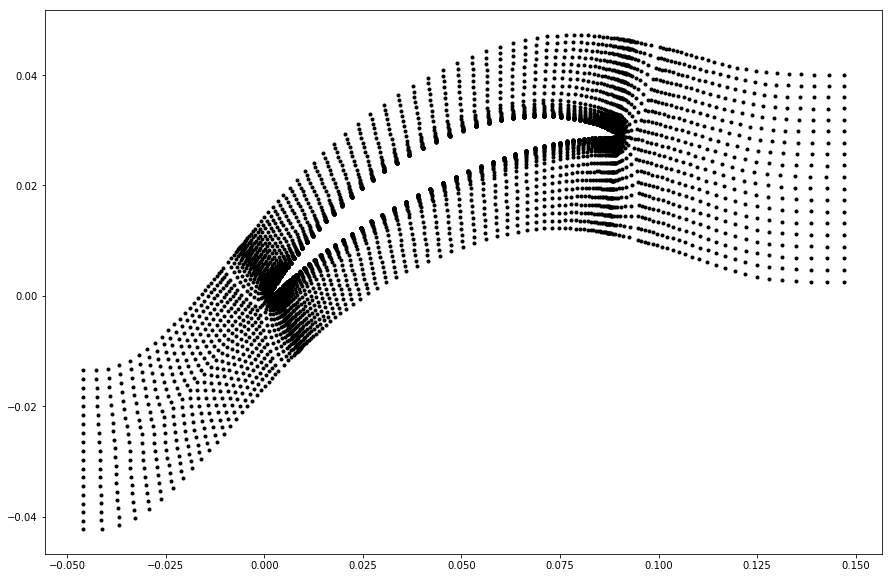

In [6]:
plt.figure(figsize=(15,10))
plt.plot(z, x, 'k.')
plt.show()

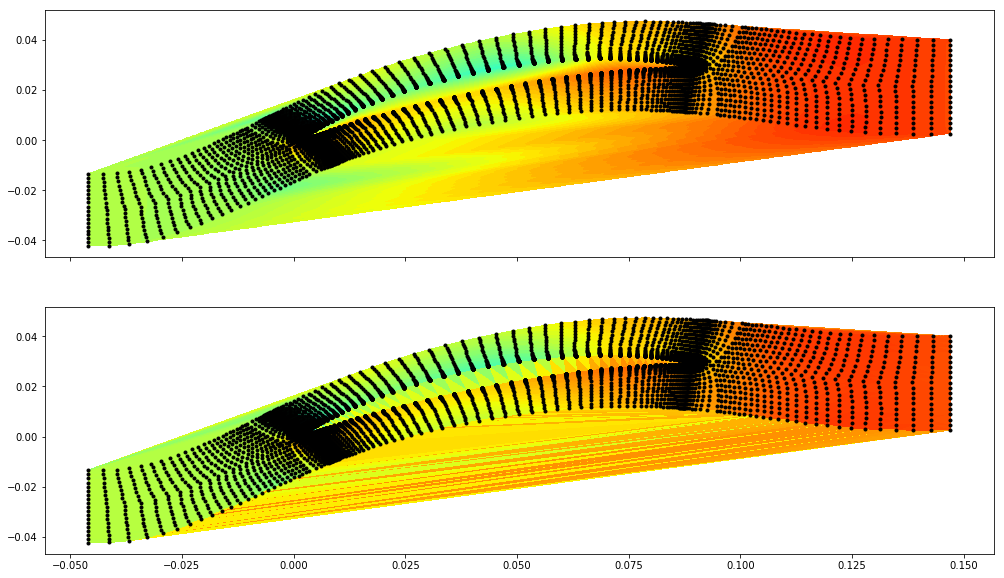

In [7]:
Xi = np.linspace(min(z), max(z), num=500)
Yi = np.linspace(min(x), max(x), num=500)
Z = griddata(z, x, pressure, Xi, Yi, interp = 'linear')
X, Y = np.meshgrid (Xi, Yi)

#plt.figure(figsize=(15,10))
f, blade = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(17,10))
blade[0].contourf(X,Y,Z,100,cmap=cm.jet)
blade[0].plot(z, x, 'k.')
#blade[0].figure(figsize=(15,10))
blade[1].tripcolor(z,x,pressure,cmap=cm.jet)
blade[1].plot(z, x, 'k.')
#blade.colorbar()
plt.show()

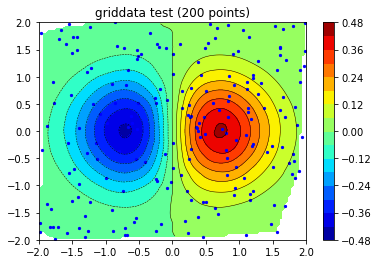

In [8]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import numpy.ma as ma
from numpy.random import uniform, seed
# make up some randomly distributed data
seed(1234)
npts = 200
x = uniform(-2,2,npts)
y = uniform(-2,2,npts)
z = x*np.exp(-x**2-y**2)
# define grid.
xi = np.linspace(-2.1,2.1,100)
yi = np.linspace(-2.1,2.1,100)
# grid the data.
zi = griddata((x, y), z, (xi[None,:], yi[:,None]), method='cubic')
# contour the gridded data, plotting dots at the randomly spaced data points.
CS = plt.contour(xi,yi,zi,15,linewidths=0.5,colors='k')
CS = plt.contourf(xi,yi,zi,15,cmap=plt.cm.jet)
plt.colorbar() # draw colorbar
# plot data points.
plt.scatter(x,y,marker='o',c='b',s=5)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.title('griddata test (%d points)' % npts)
plt.show()